In [1]:
import os

os.chdir('D:\\datasets\\NLP')
os.getcwd()

'D:\\datasets\\NLP'

In [2]:
# importing dataset 
import pandas as pd
df=pd.read_csv("SMSSpamCollection", sep='\t',index_col=None)
df.columns =['target', 'message']  
df.head()

,target,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
df.shape

(5571, 2)

In [4]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5571 non-null   object
 1   message  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# data processing
import nltk
import re
#nltk.download()

In [7]:
from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
wnl=WordNetLemmatizer()

In [8]:
sent=[]

In [9]:
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    review = review.lower()
    review = review.split()

     
    review = [wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    sent.append(review)


In [10]:
# Creating the TfIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(sent).toarray()

In [11]:
y=pd.get_dummies(df['target'])
y=y.iloc[:,1].values


In [12]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detection_model = MultinomialNB().fit(X_train, y_train)

y_predicted=spam_detection_model.predict(X_test)


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns 

In [15]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[943,   0],
       [ 27, 145]], dtype=int64)

<AxesSubplot:>

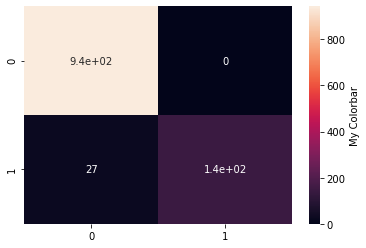

In [16]:
sns.heatmap(cm,annot=True, cbar_kws={'label': 'My Colorbar'})

In [17]:
acc_score=accuracy_score(y_test,y_predicted)
acc_score

0.9757847533632287